In [1]:
from pycbc.waveform import get_td_waveform

from gwpy.timeseries import TimeSeries

import numpy as np
import pylab

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

from scipy.optimize import curve_fit

In [2]:
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
rc('xtick', labelsize=14) 
rc('ytick', labelsize=14)

## Phase Accumulation

To get the phase, calculate the complex strain and extract the phase:

$$ h_{complex} = h_+\,+\,i\,h_{\times} \sim A\,e^{i\,\varphi}$$

In [3]:
# Function to calculate phase accumulation of waveform with polarizations
# hplus & hcross

def PhaseAccum(hplus, hcross): 
    
    phase_arr = []
    
    for i in range(len(hplus)):
        
        # Complex strain
        h_complex = complex(hplus[i],hcross[i])   
        
        # Extract phase
        phase = np.angle(h_complex)  
        phase_arr.append(phase)
        
    accum_phase_arr = np.unwrap(phase_arr)

    return accum_phase_arr

In [4]:
# Function to calculate phase difference between two waveform with polarizations
# hplus1 & hcross1 and hplus2 & hcross2

def PhaseDifference(hplus1, hcross1, hplus2, hcross2):
    
    accum_phase_arr_1 = PhaseAccum(hplus1, hcross1)
    accum_phase_arr_2 = PhaseAccum(hplus2, hcross2)
    
    # Trimming arrays to be same length:
    
    len1 = len(accum_phase_arr_1)
    len2 = len(accum_phase_arr_2)
    
    if len1 > len2: 
        phase_diff_arr = np.abs(accum_phase_arr_1[len1-len2:] - accum_phase_arr_2)
    elif len2 > len1: 
        phase_diff_arr = np.abs(accum_phase_arr_1 - accum_phase_arr_2[len2-len1:])
    else:
        phase_diff_arr = np.abs(accum_phase_arr_1 - accum_phase_arr_2)
        
    return phase_diff_arr

## Generating Waveforms using EccentricTD

In [5]:
# Eccentricity of 1e-10 (hopefully negligible)
e0 = 1e-10
hp0, hc0 = get_td_waveform(approximant="EccentricTD",
                         mass1=10,
                         mass2=10,
                         delta_t=1.0/4096,
                         eccentricity=e0,
                         f_lower=20)


e1 = 0.01
hp1, hc1 = get_td_waveform(approximant="EccentricTD",
                         mass1=10,
                         mass2=10,
                         delta_t=1.0/4096,
                         eccentricity=e1,
                         f_lower=20)

e2 = 0.05
hp2, hc2 = get_td_waveform(approximant="EccentricTD",
                         mass1=10,
                         mass2=10,
                         delta_t=1.0/4096,
                         eccentricity=e2,
                         f_lower=20)


# Eccentricity of 0.1 
e3 = 0.1
hp3, hc3 = get_td_waveform(approximant="EccentricTD",
                         mass1=10,
                         mass2=10,
                         delta_t=1.0/4096,
                         eccentricity=e3,
                         f_lower=20)

# Eccentricity of 0.2 
e4 = 0.2
hp4, hc4 = get_td_waveform(approximant="EccentricTD",
                         mass1=10,
                         mass2=10,
                         delta_t=1.0/4096,
                         eccentricity=e4,
                         f_lower=20)

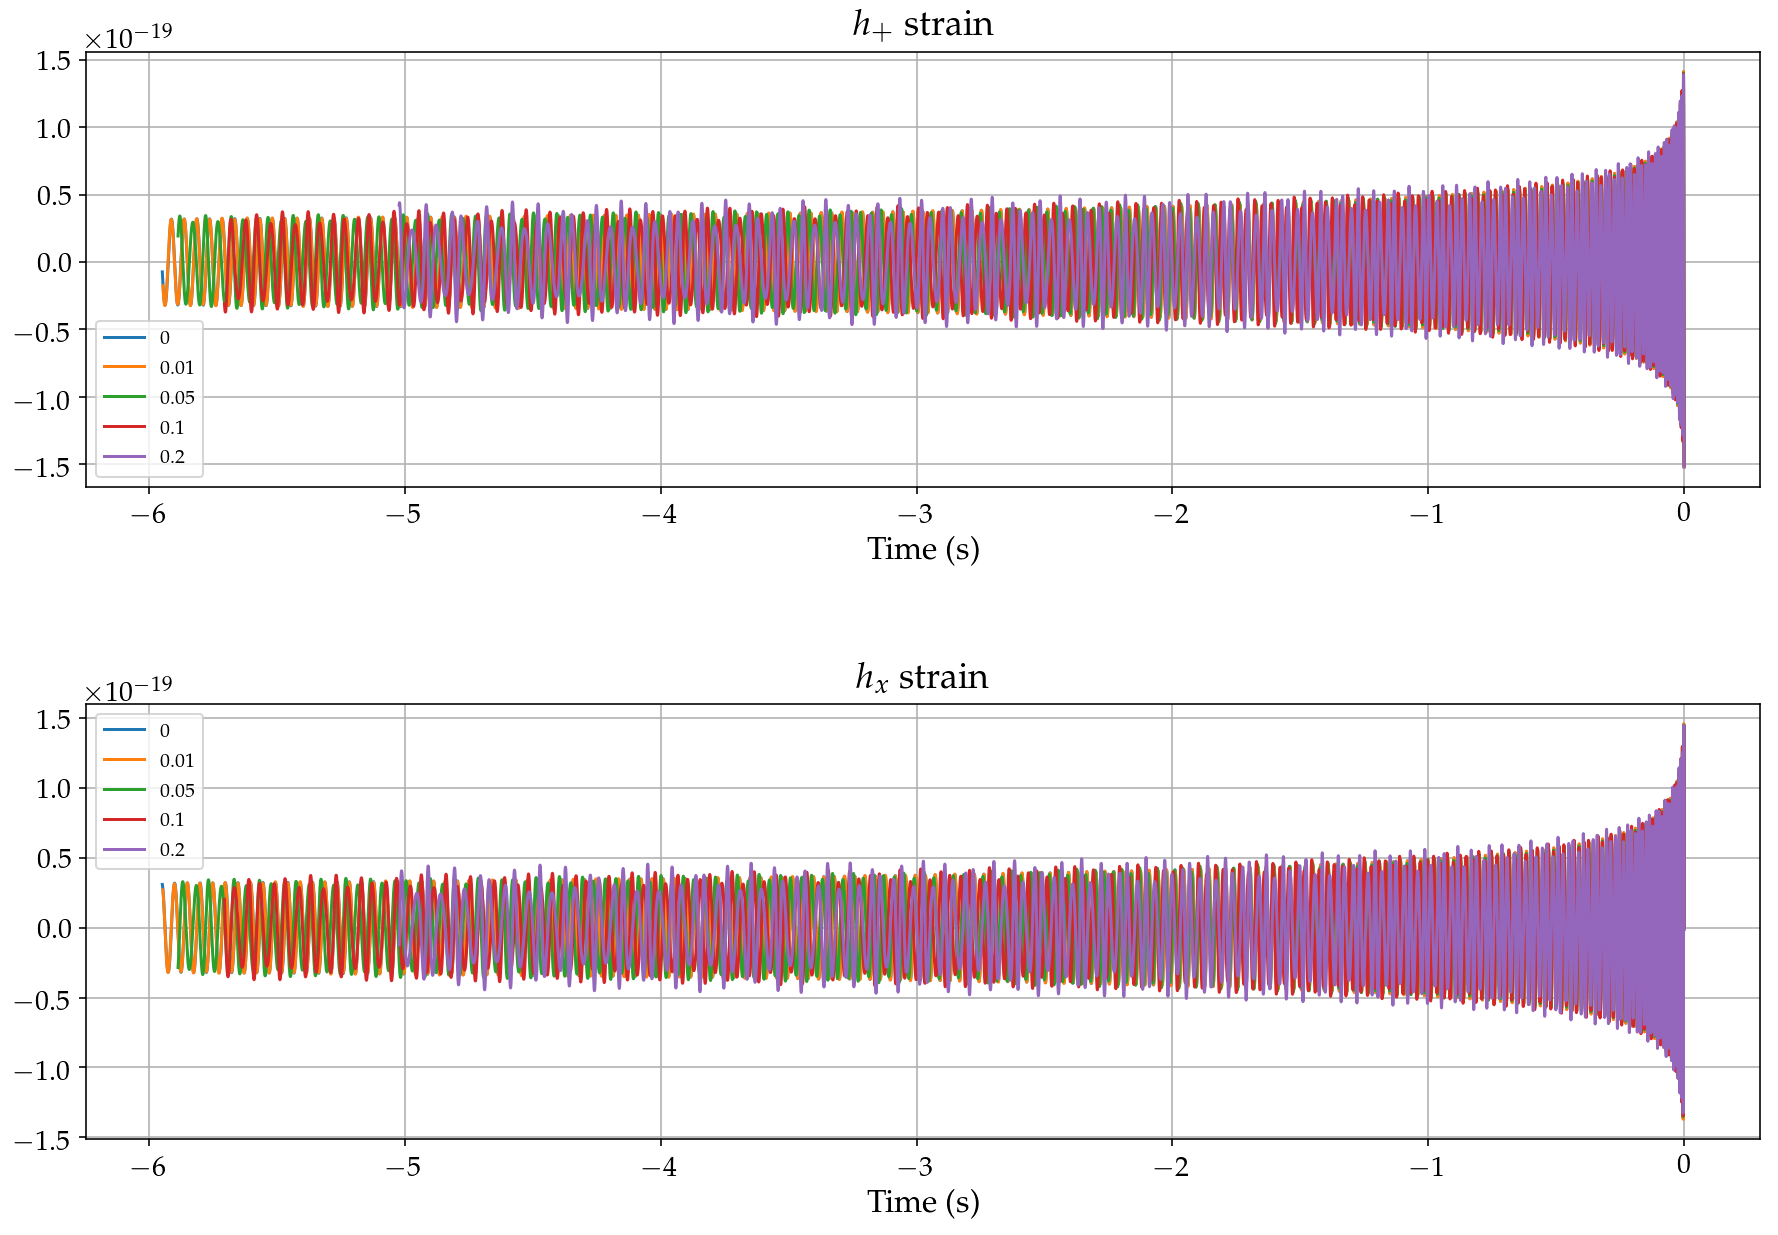

In [6]:
plt.figure(figsize=(15,10))

plt.subplot(2,1,1)
plt.plot(hp0.sample_times, hp0, label=0)
plt.plot(hp1.sample_times, hp1, label=e1)
plt.plot(hp2.sample_times, hp2, label=e2)
plt.plot(hp3.sample_times, hp3, label=e3)
plt.plot(hp4.sample_times, hp4, label=e4)
plt.xlabel('Time (s)', fontsize=16)
plt.title('$h_+$ strain', fontsize=18)
plt.legend()
plt.grid()

plt.subplot(2,1,2)
plt.plot(hc0.sample_times, hc0, label=0)
plt.plot(hc1.sample_times, hc1, label=e1)
plt.plot(hc2.sample_times, hc2, label=e2)
plt.plot(hc3.sample_times, hc3, label=e3)
plt.plot(hc4.sample_times, hc4, label=e4)
plt.xlabel('Time (s)', fontsize=16)
plt.title('$h_x$ strain', fontsize=18)
plt.legend()
plt.grid()

plt.subplots_adjust(hspace=.5)

## Phase

In [7]:
phase0 = PhaseAccum(hp0, hc0)
phase1 = PhaseAccum(hp1, hc1)
phase2 = PhaseAccum(hp2, hc2)
phase3 = PhaseAccum(hp3, hc3)
phase4 = PhaseAccum(hp4, hc4)

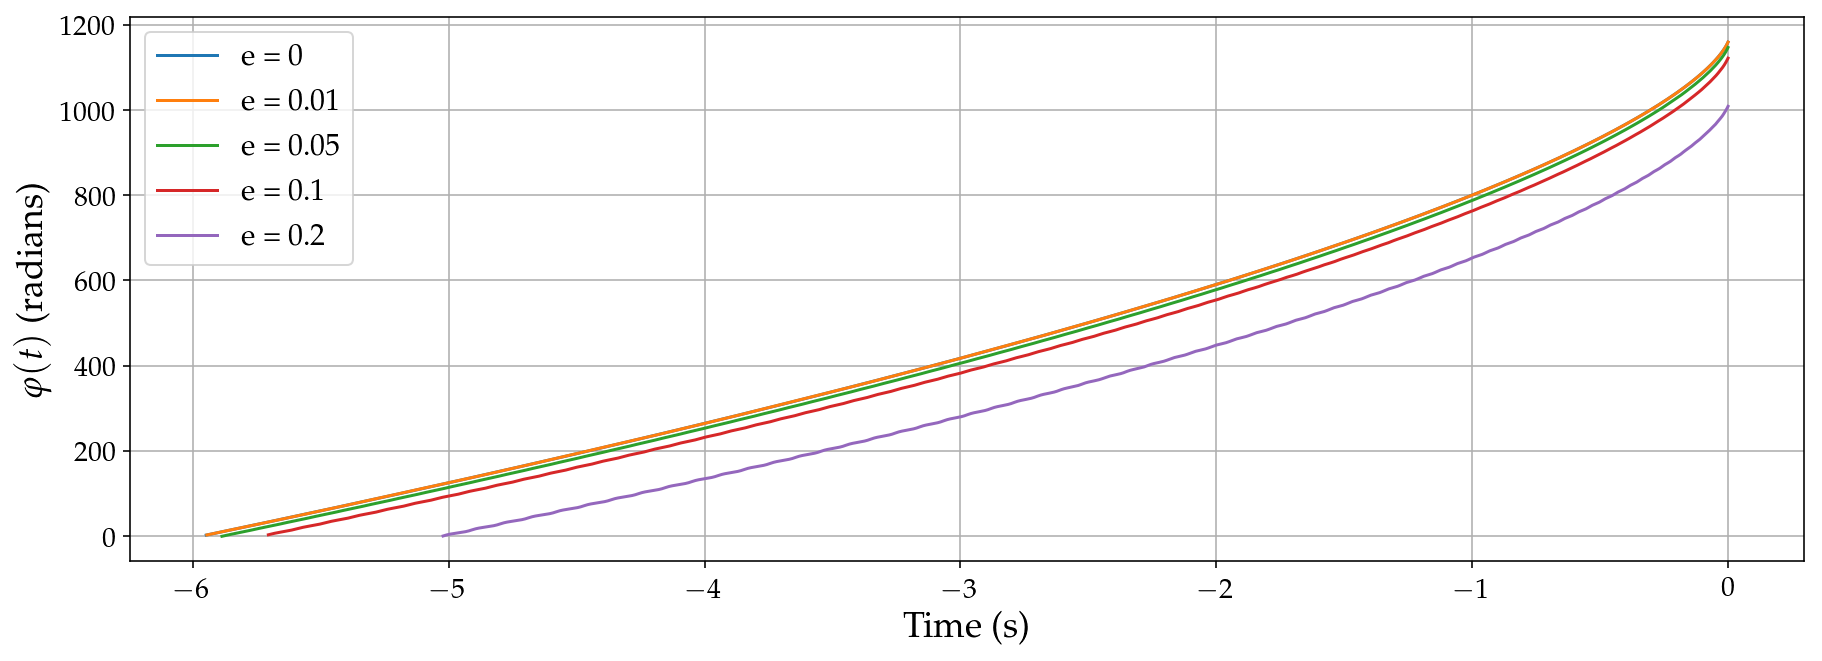

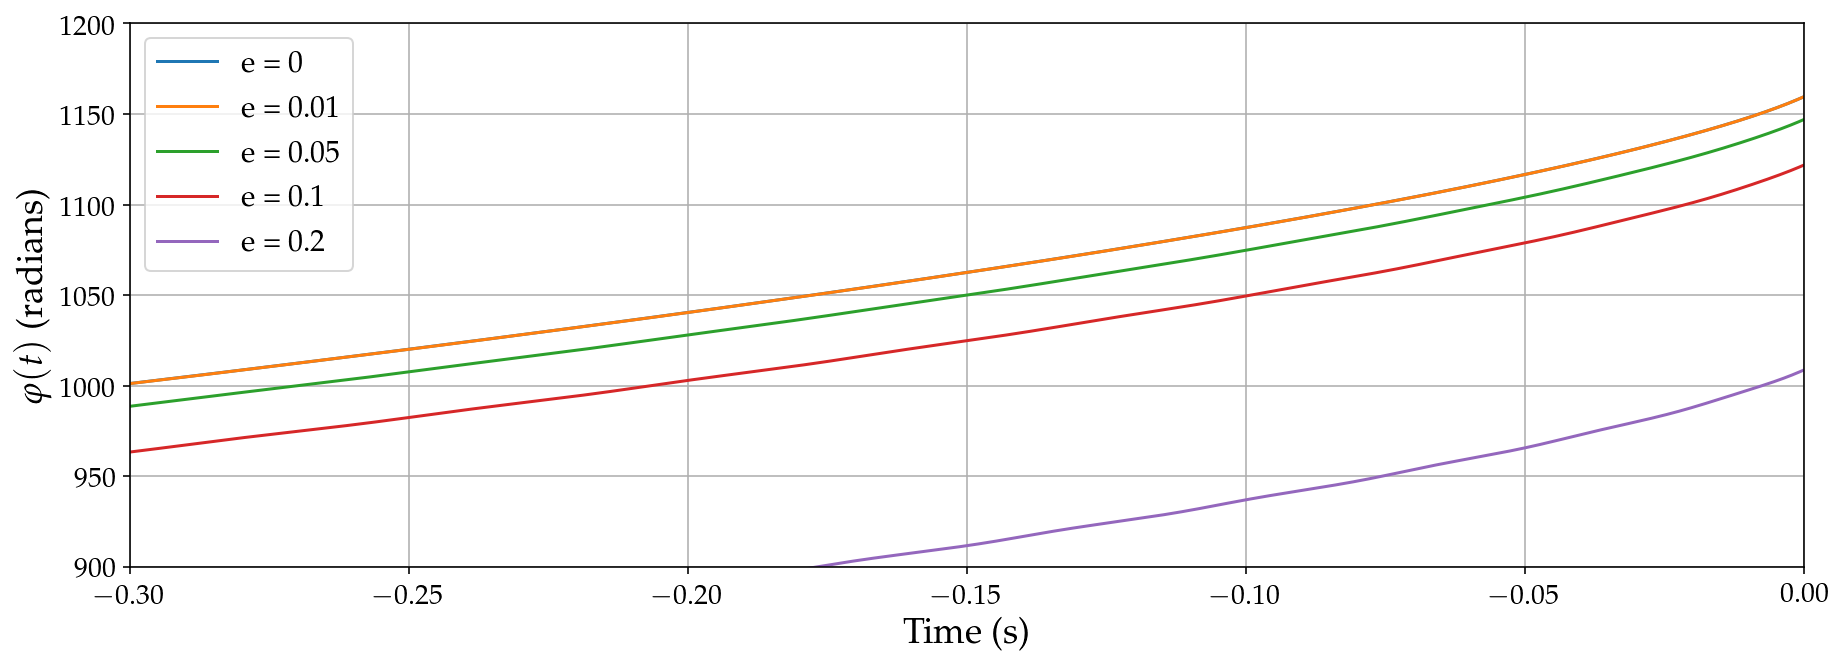

In [8]:
# Plotting phase difference: 

plt.figure(figsize=(15,5))
plt.plot(hp0.sample_times, phase0, label="e = {}".format(0))
plt.plot(hp1.sample_times, phase1, label="e = {}".format(e1))
plt.plot(hp2.sample_times, phase2, label="e = {}".format(e2))
plt.plot(hp3.sample_times, phase3, label="e = {}".format(e3))
plt.plot(hp4.sample_times, phase4, label="e = {}".format(e4))
plt.xlabel("Time (s)", fontsize=18)
plt.ylabel(r"$\varphi(t)$ (radians)", fontsize=18)
plt.legend(fontsize=15, loc=2)
plt.grid()

plt.figure(figsize=(15,5))
plt.plot(hp0.sample_times, phase0, label="e = {}".format(0))
plt.plot(hp1.sample_times, phase1, label="e = {}".format(e1))
plt.plot(hp2.sample_times, phase2, label="e = {}".format(e2))
plt.plot(hp3.sample_times, phase3, label="e = {}".format(e3))
plt.plot(hp4.sample_times, phase4, label="e = {}".format(e4))
plt.xlabel("Time (s)", fontsize=18)
plt.ylabel(r"$\varphi(t)$ (radians)", fontsize=18)
plt.legend(fontsize=15, loc=2)
plt.xlim(-0.3,0)
plt.ylim(900,1200)
plt.grid()

## Phase difference between circular and eccentric

In [9]:
# Calculating phase differences between these waveforms: 

phase_diff_1 = PhaseDifference(hp0, hc0, hp1, hc1)
phase_diff_2 = PhaseDifference(hp0, hc0, hp2, hc2)
phase_diff_3 = PhaseDifference(hp0, hc0, hp3, hc3)
phase_diff_4 = PhaseDifference(hp0, hc0, hp4, hc4)

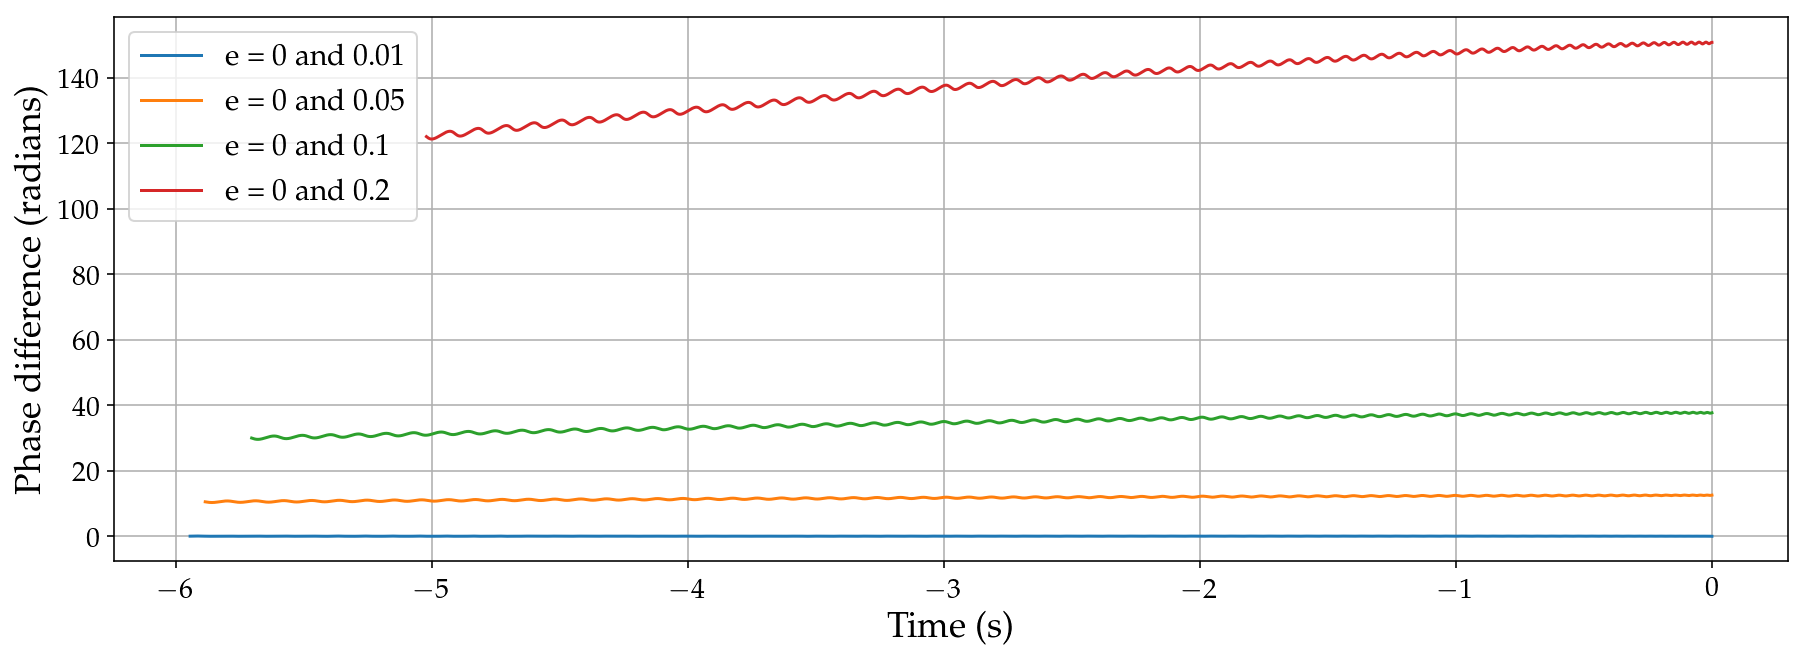

In [10]:
# Plotting phase difference: 

plt.figure(figsize=(15,5))
plt.plot(hp1.sample_times, phase_diff_1, label="e = 0 and {}".format(e1))
plt.plot(hp2.sample_times, phase_diff_2, label="e = 0 and {}".format(e2))
plt.plot(hp3.sample_times, phase_diff_3, label="e = 0 and {}".format(e3))
plt.plot(hp4.sample_times, phase_diff_4, label="e = 0 and {}".format(e4))
plt.xlabel("Time (s)", fontsize=18)
plt.ylabel("Phase difference (radians)", fontsize=18)
plt.legend(fontsize=15, loc=2)
plt.grid()

## Derivative of Phase 

In [11]:
%%capture output
%run Derivative_function.ipynb

In [12]:
der_phase_accum_0 = Derivative(phase0, hp0.sample_times)
der_phase_accum_1 = Derivative(phase1, hp1.sample_times)
der_phase_accum_2 = Derivative(phase2, hp2.sample_times)
der_phase_accum_3 = Derivative(phase3, hp3.sample_times)
der_phase_accum_4 = Derivative(phase4, hp4.sample_times)

(280, 1400)

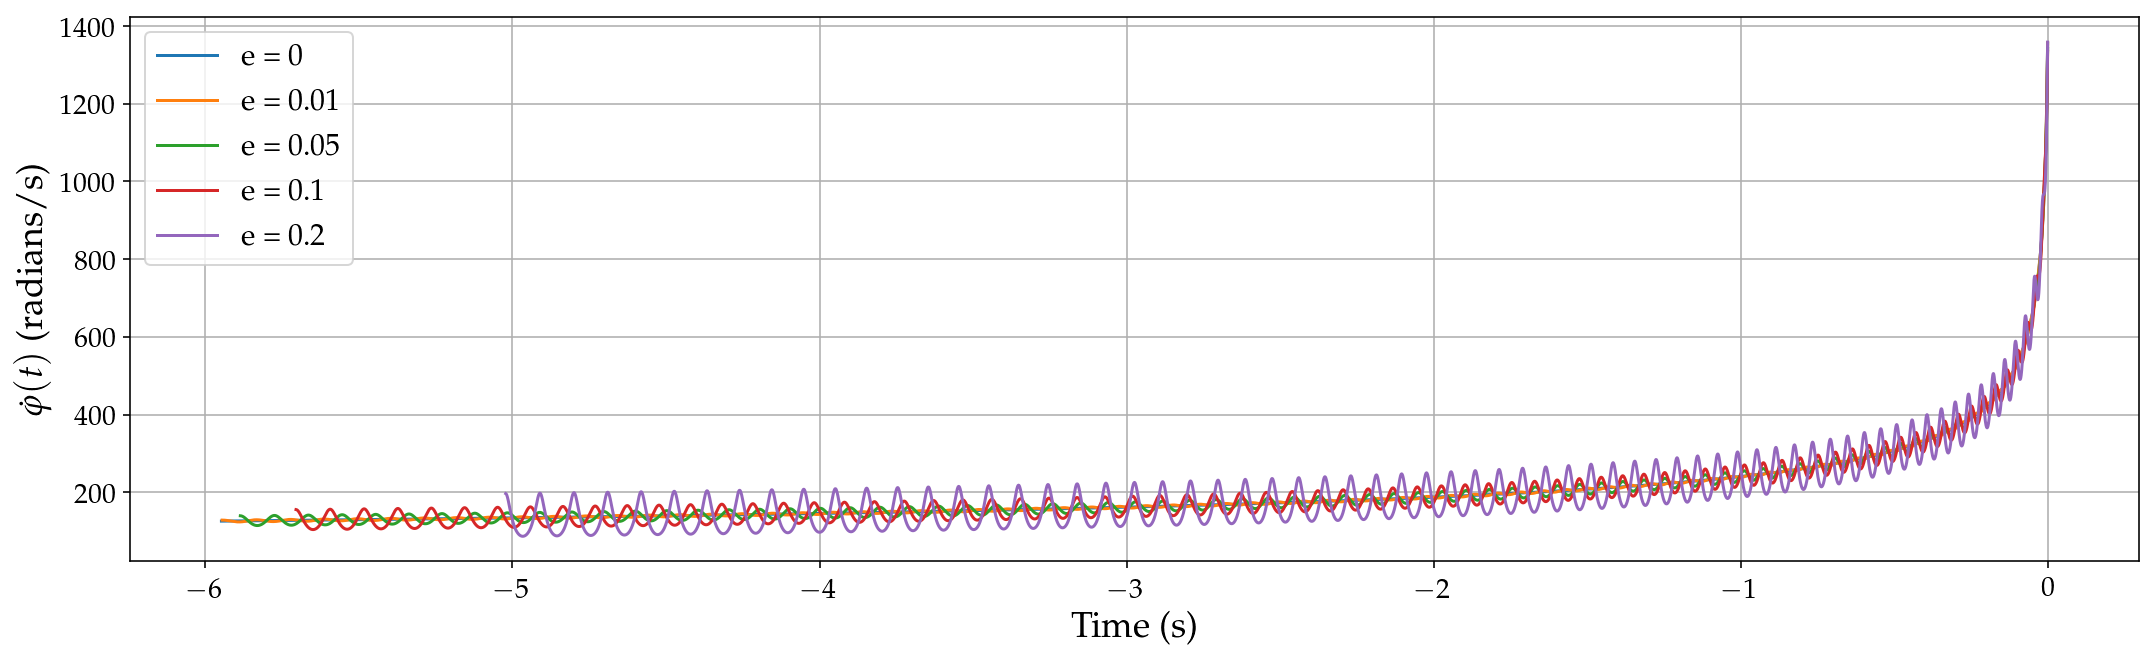

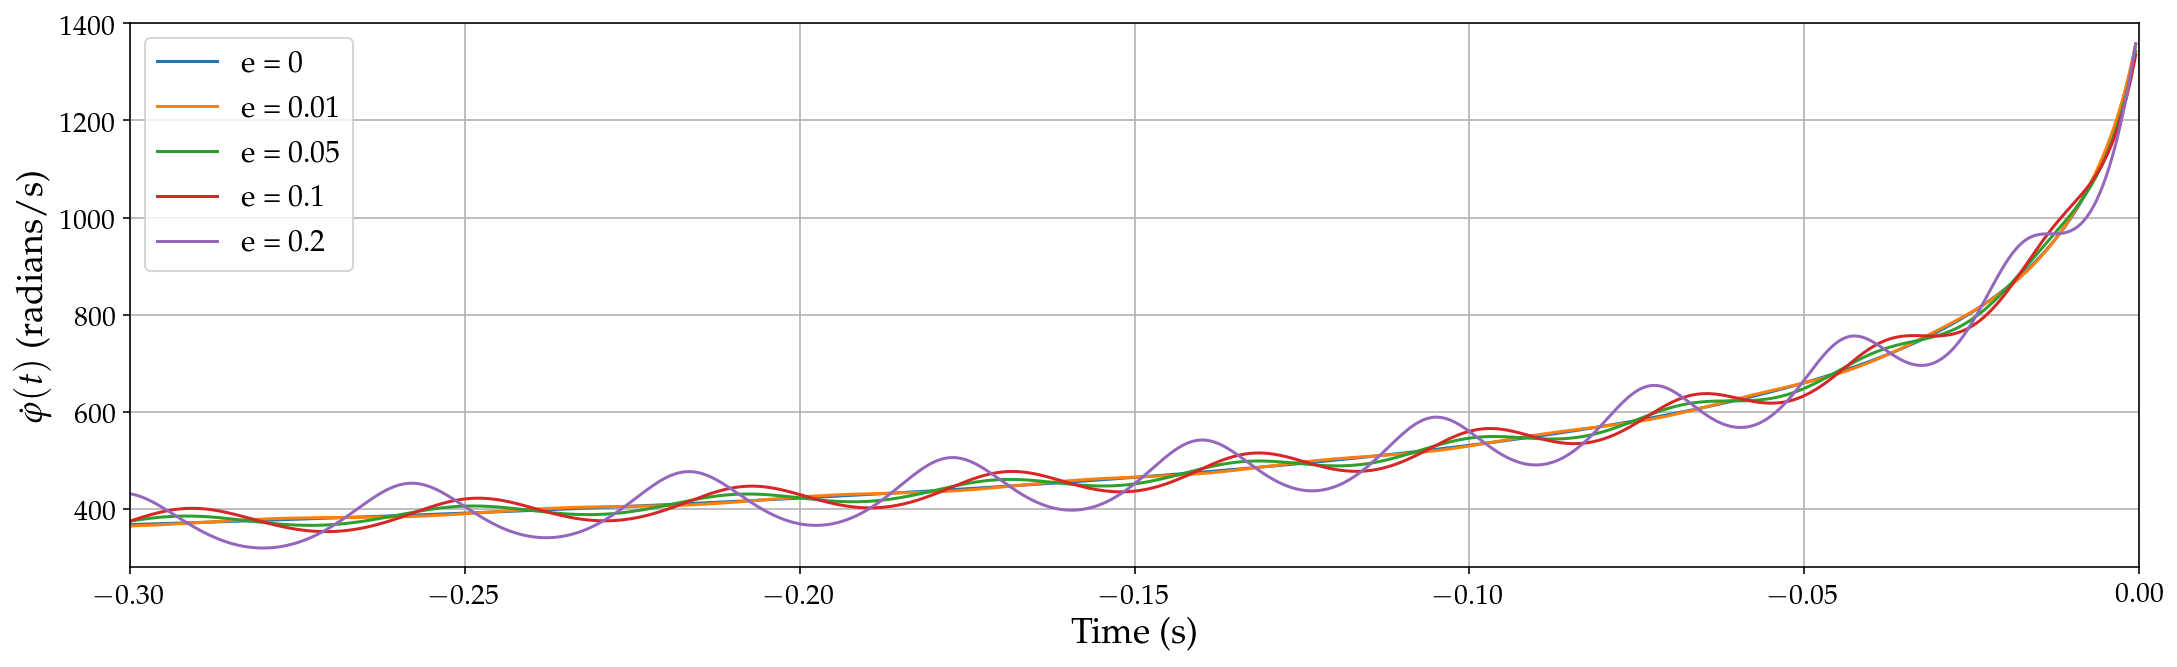

In [13]:
plt.figure(figsize=(18,5))
plt.plot(hp0.sample_times[1:-1], der_phase_accum_0, label = "e = {}".format(0))
plt.plot(hp1.sample_times[1:-1], der_phase_accum_1, label = "e = {}".format(e1))
plt.plot(hp2.sample_times[1:-1], der_phase_accum_2, label = "e = {}".format(e2))
plt.plot(hp3.sample_times[1:-1], der_phase_accum_3, label = "e = {}".format(e3))
plt.plot(hp4.sample_times[1:-1], der_phase_accum_4, label = "e = {}".format(e4))
plt.xlabel("Time (s)", fontsize=18)
plt.ylabel(r"$\dot{\varphi}(t)$ (radians/s)", fontsize=18)
plt.grid()
plt.legend(fontsize=15)

plt.figure(figsize=(18,5))
plt.plot(hp0.sample_times[1:-1], der_phase_accum_0, label = "e = {}".format(0))
plt.plot(hp1.sample_times[1:-1], der_phase_accum_1, label = "e = {}".format(e1))
plt.plot(hp2.sample_times[1:-1], der_phase_accum_2, label = "e = {}".format(e2))
plt.plot(hp3.sample_times[1:-1], der_phase_accum_3, label = "e = {}".format(e3))
plt.plot(hp4.sample_times[1:-1], der_phase_accum_4, label = "e = {}".format(e4))
plt.xlabel("Time (s)", fontsize=18)
plt.ylabel(r"$\dot{\varphi}(t)$ (radians/s)", fontsize=18)
plt.grid()
plt.legend(fontsize=15)
plt.xlim(-0.3,0)
plt.ylim(280,1400)

## Finding best fit curve for derivative of phase accum. of waveform with negligible eccentricity

$$ 
f_{GW}(t) \sim \frac{1}{\pi} \bigg(\frac{5}{256}\,\frac{1}{t_c\,-\,t}\bigg)^{3/8} 
\bigg(\frac{G\,M_c}{c^3}\bigg)^{-5/8} 
$$

$$ 
f_{GW}(t) \sim 134\,Hz\, \bigg(\frac{1.21\,M_{sun}}{M_c}\bigg)^{5/8} \,\bigg(\frac{1}{t_c\,-\,t}\bigg)^{3/8}
$$

Phase of a GW is: 

$$ 
\varphi(t) \sim \int_{0}^{t} 2\,\pi\,f_{GW}(t)\,dt
$$

therefore

$$ 
\dot{\varphi}(t) \sim  2\,\pi\,f_{GW}(t)
$$

meaning

$$ 
\dot{\varphi}(t) \sim 2\,\pi\,134\,Hz\, \bigg(\frac{1.21\,M_{sun}}{M_c}\bigg)^{5/8} \,\bigg(\frac{1}{t_c\,-\,t}\bigg)^{3/8} 
$$

In [14]:
#def approximation(t, t_c,chirpmass, C0):
    #return 2*np.pi*134*((1.21/chirpmass)**(5.0/8))*(((3.0/8)*t*((1.0/(t_c-t))**(11.0/8)))+((1.0/(t_c-t))**(3.0/8))) + C0

In [15]:
def approximation(t, t_c,chirpmass):
    return 2*np.pi*134*((1.21/chirpmass)**(5.0/8))*((1.0/(t_c-t))**(3.0/8))

In [16]:
best_vals, covar = curve_fit(approximation, hp0.sample_times[1:-1], der_phase_accum_0)

/home/pycbc/pycbc-software/lib/python2.7/site-packages/PyCBC-1.9.2-py2.7.egg/pycbc/types/array.py:392: RuntimeWarning: invalid value encountered in power
  return self._data ** other


In [17]:
t_c = best_vals[0]
chirpmass = best_vals[1]
#C0 = best_vals[2]

print "t_c:",t_c,"seconds"
print "chirp mass:",chirpmass,"solar mass units"
#print "C0:",C0

t_c: 0.0120608062367 seconds
chirp mass: 8.98713346186 solar mass units


In [18]:
approx = [approximation(t, t_c, chirpmass) for t in hp0.sample_times[1:-1]]

In [19]:
difference0 = []

for i in range(len(der_phase_accum_0)):
    difference0.append(der_phase_accum_0[i] - approx[i])

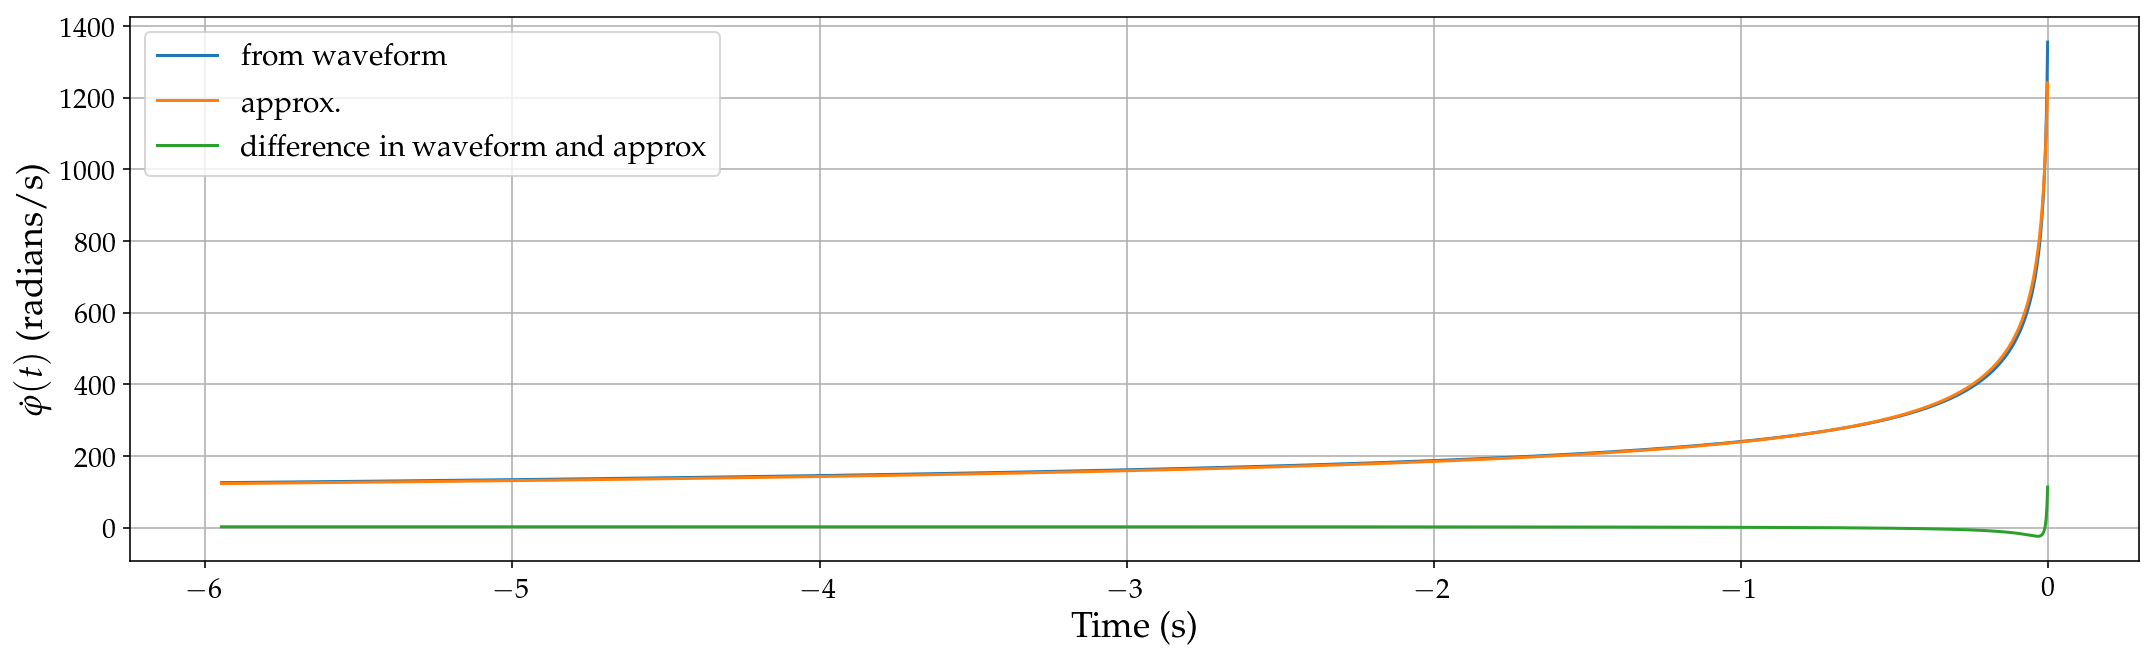

In [20]:
plt.figure(figsize=(18,5))
plt.plot(hp0.sample_times[1:-1], der_phase_accum_0, label = "from waveform")
plt.plot(hp0.sample_times[1:-1], approx, label = "approx.")
plt.plot(hp0.sample_times[1:-1], difference0, label = "difference in waveform and approx")
plt.xlabel("Time (s)", fontsize=18)
plt.ylabel(r"$\dot{\varphi}(t)$ (radians/s)", fontsize=18)
plt.grid()
plt.legend(fontsize=15)

In [21]:
# Subtracting approx. from other derivative of phase accum. plots

difference1 = []
approx_trimmed_1 = approx[len(approx)-len(der_phase_accum_1):]

for i in range(len(der_phase_accum_1)):
    difference1.append(der_phase_accum_1[i] - approx_trimmed_1[i])
    
print len(hp1.sample_times[1:-1]), len(difference1)
    
    

difference2 = []
approx_trimmed_2 = approx[len(approx)-len(der_phase_accum_2):]

for i in range(len(der_phase_accum_2)):
    difference2.append(der_phase_accum_2[i] - approx_trimmed_2[i])
    
print len(hp2.sample_times[1:-1]), len(difference2)

    
    
difference3 = []
approx_trimmed_3 = approx[len(approx)-len(der_phase_accum_3):]

for i in range(len(der_phase_accum_3)):
    difference3.append(der_phase_accum_3[i] - approx_trimmed_3[i])
    
print len(hp3.sample_times[1:-1]), len(difference3)

    
        
difference4 = []
approx_trimmed_4 = approx[len(approx)-len(der_phase_accum_4):]

for i in range(len(der_phase_accum_4)):
    difference4.append(der_phase_accum_4[i] - approx_trimmed_4[i])
    
print len(hp4.sample_times[1:-1]), len(difference4)

24351 24351
24109 24109
23366 23366
20569 20569


(-4, -3.2)

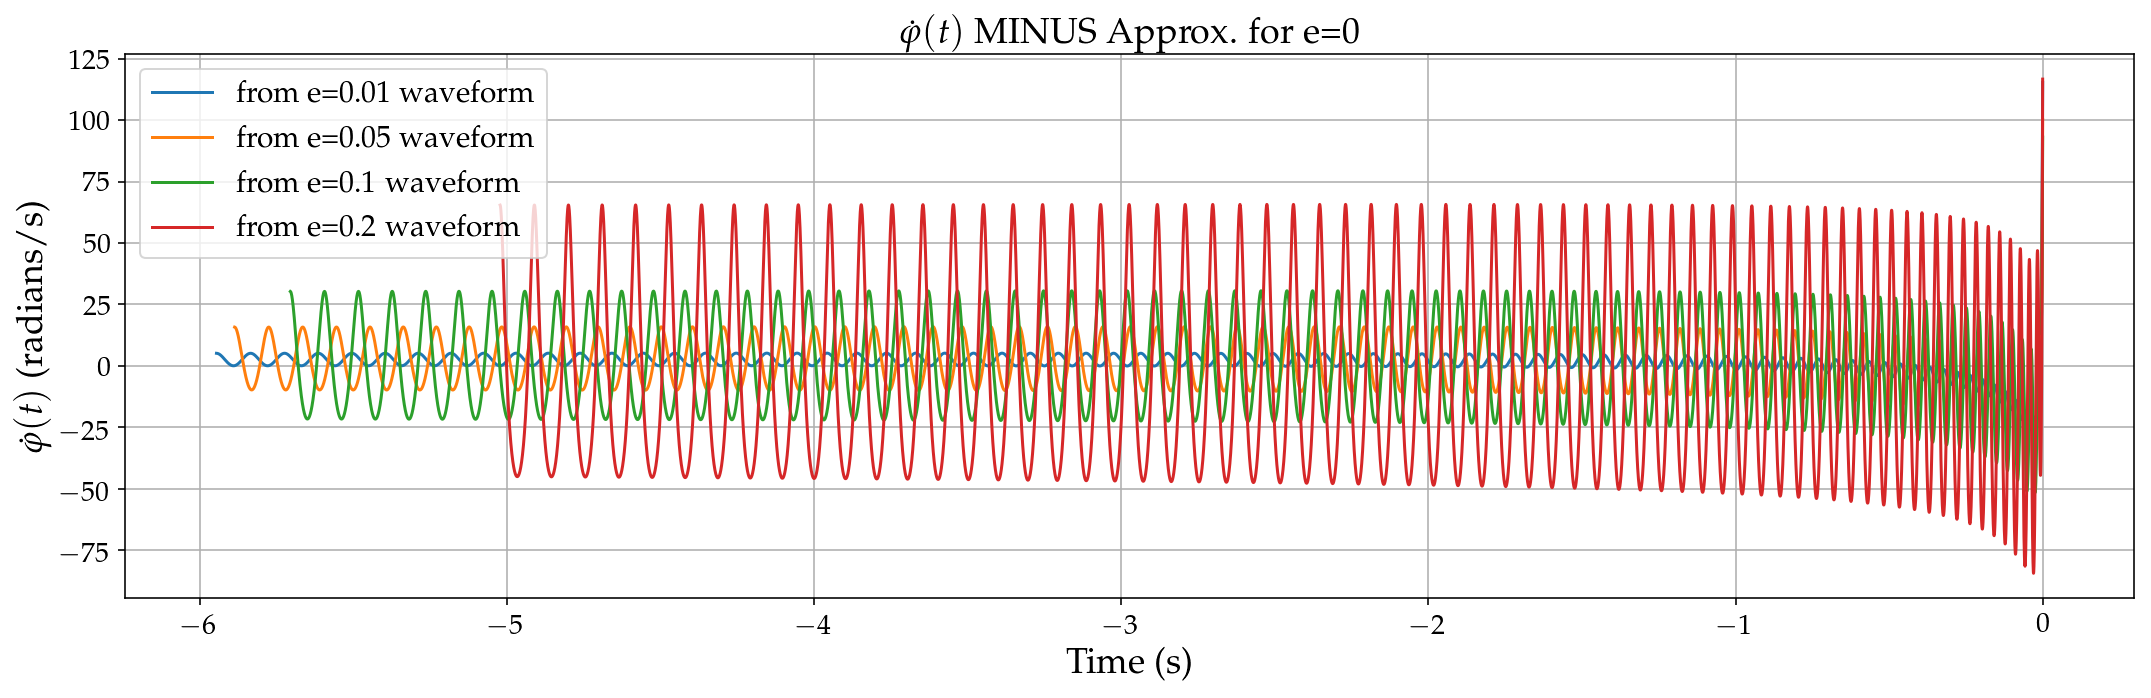

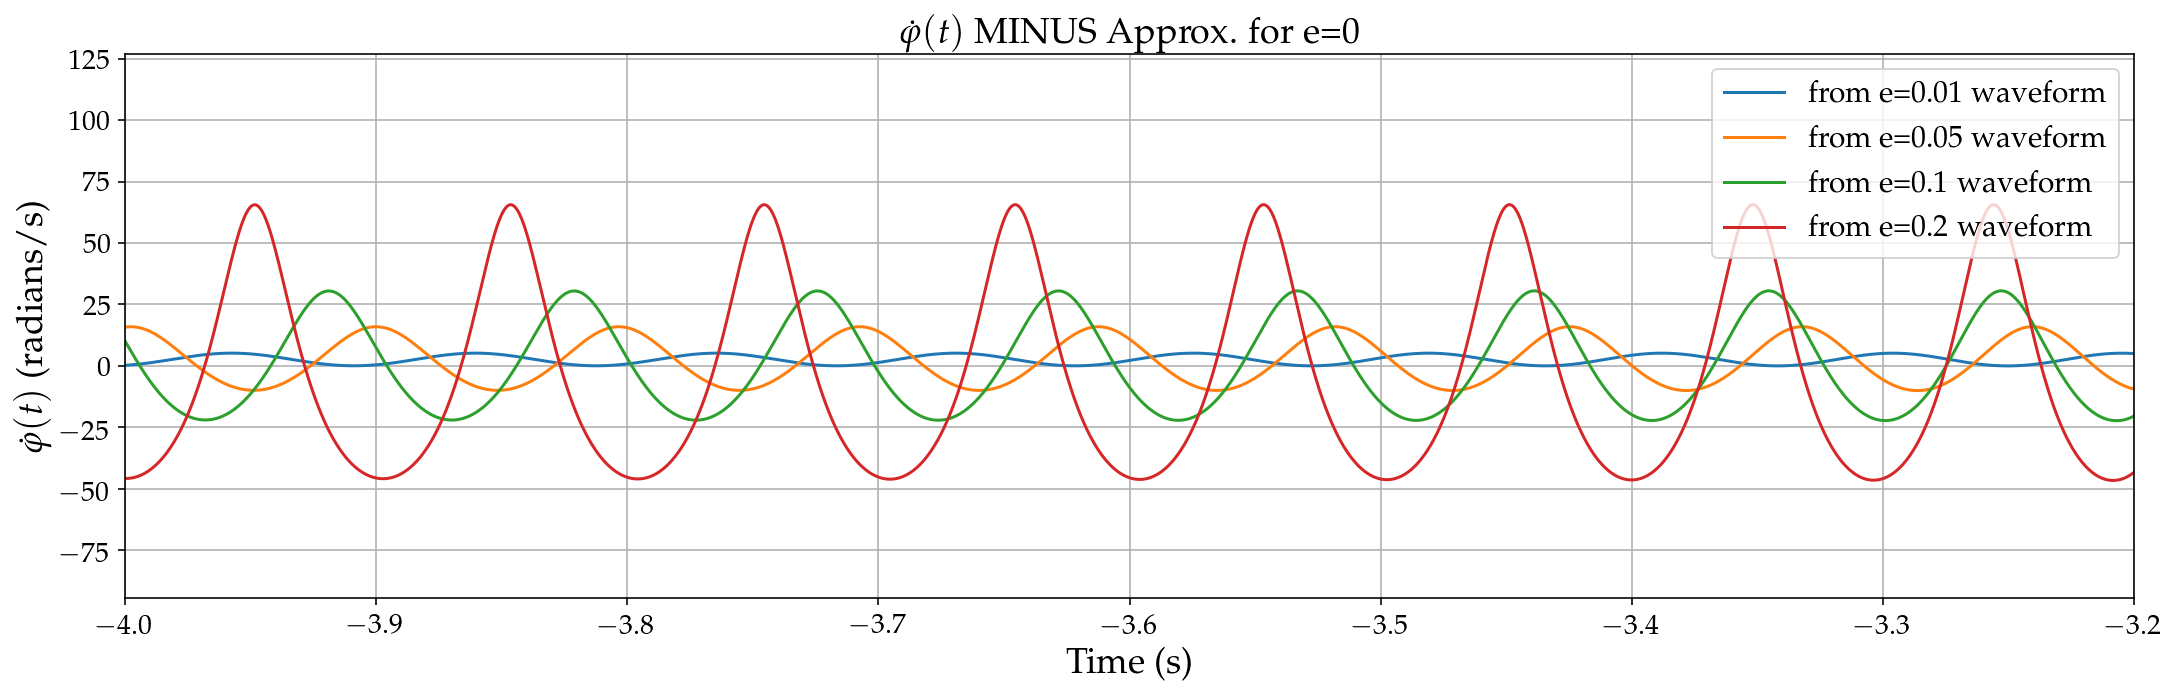

In [22]:
plt.figure(figsize=(18,5))
plt.plot(hp1.sample_times[1:-1], difference1, label = "from e={} waveform".format(e1))
plt.plot(hp2.sample_times[1:-1], difference2, label = "from e={} waveform".format(e2))
plt.plot(hp3.sample_times[1:-1], difference3, label = "from e={} waveform".format(e3))
plt.plot(hp4.sample_times[1:-1], difference4, label = "from e={} waveform".format(e4))
plt.xlabel("Time (s)", fontsize=18)
plt.ylabel(r"$\dot{\varphi}(t)$ (radians/s)", fontsize=18)
plt.title(r"$\dot{\varphi}(t)$  MINUS Approx. for e=0", fontsize=18)
plt.grid()
plt.legend(fontsize=15)


plt.figure(figsize=(18,5))
plt.plot(hp1.sample_times[1:-1], difference1, label = "from e={} waveform".format(e1))
plt.plot(hp2.sample_times[1:-1], difference2, label = "from e={} waveform".format(e2))
plt.plot(hp3.sample_times[1:-1], difference3, label = "from e={} waveform".format(e3))
plt.plot(hp4.sample_times[1:-1], difference4, label = "from e={} waveform".format(e4))
plt.xlabel("Time (s)", fontsize=18)
plt.ylabel(r"$\dot{\varphi}(t)$ (radians/s)", fontsize=18)
plt.title(r"$\dot{\varphi}(t)$  MINUS Approx. for e=0", fontsize=18)
plt.grid()
plt.legend(fontsize=15)
plt.xlim(-4,-3.2)

## Finding best fit for sinusoidal portion

$$ \dot{\varphi}(t) \sim \frac{a\,(1-e^2)}{\big(1\,+\,e\,cos(f(t))\,\big)^n}$$

In [23]:
def approximation2(t,a, b, c):
    return a*np.cos(2*np.pi*9*b*t)+c

In [24]:
best_vals2, covar2 = curve_fit(approximation2, hp1.sample_times[1:-23000], difference1[:-22999])

a = best_vals2[0]
b = best_vals2[1]
c = best_vals2[2]

print "a:",a
print "b:",b
print "c:",c

a: -2.55210343948
b: 0.999756831368
c: 2.55411406221


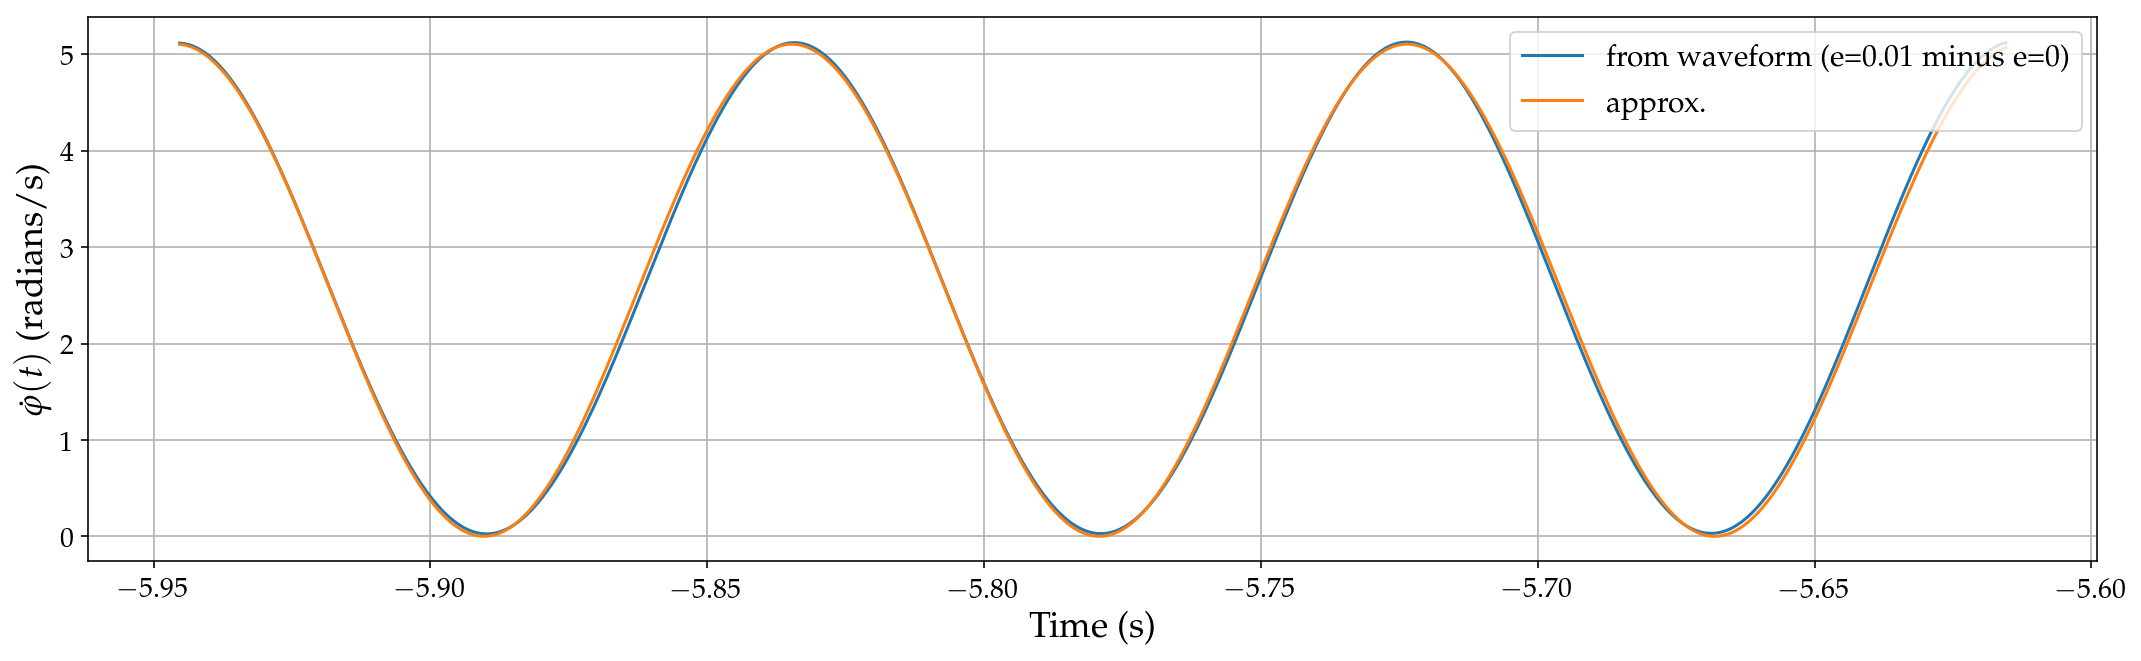

In [25]:
approx2 = [approximation2(t, a, b, c) for t in hp1.sample_times[1:-23000]]
#diff = approx2[len(approx)-len(difference1):] - difference1

plt.figure(figsize=(18,5))
plt.plot(hp1.sample_times[1:-23000], difference1[:-22999], label = "from waveform (e={} minus e={})".format(e1,0))
plt.plot(hp1.sample_times[1:-23000], approx2, label = "approx.")
#plt.plot(hp1.sample_times[1:-1], diff, label = "difference in waveform and approx")
plt.xlabel("Time (s)", fontsize=18)
plt.ylabel(r"$\dot{\varphi}(t)$ (radians/s)", fontsize=18)
plt.grid()
plt.legend(fontsize=15)

## Spectrogram

In [28]:
# e0 = 0.5 
hp5, hc5 = get_td_waveform(approximant="EccentricTD",
                         mass1=2,
                         mass2=2,
                         delta_t=1.0/4096,
                         eccentricity=0.5,
                         f_lower=20)

phase5 = PhaseAccum(hp5, hc5)
der_phase_accum_5 = Derivative(phase5, hp5.sample_times)

ts = TimeSeries(der_phase_accum_5, times=hp5.sample_times[1:-1])

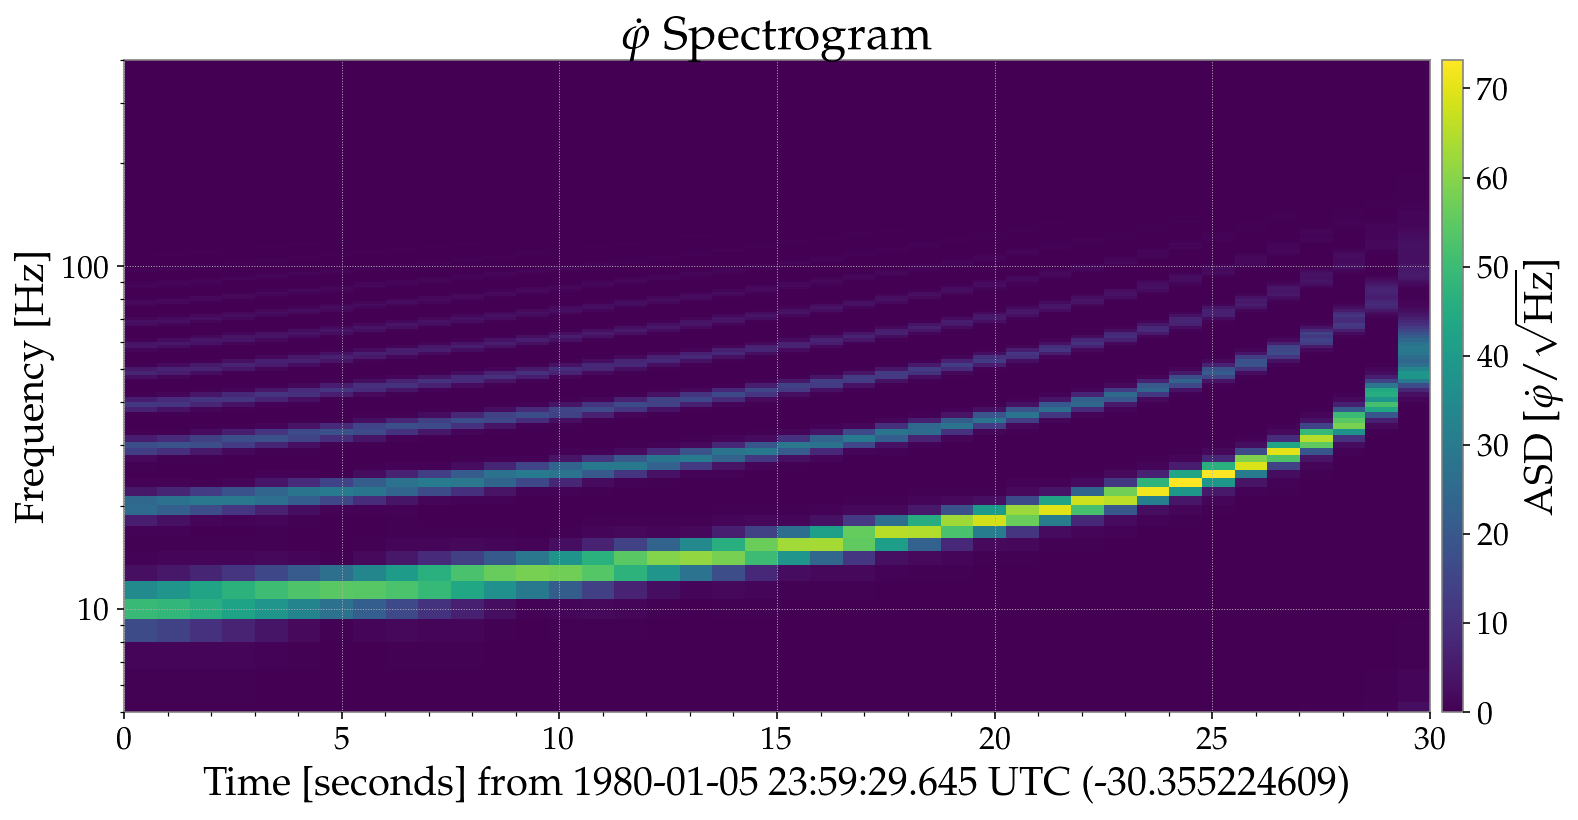

In [39]:
specgram = ts.spectrogram(0.75, fftlength=0.75, overlap=0.375) ** (1/2.)

plot = specgram.plot()
ax = plot.gca()
ax.set_ylim(5, 400)
ax.set_yscale('log')
ax.set_title(r'$\dot{\varphi}$ Spectrogram')
plot.add_colorbar(label=r'ASD [$\dot{\varphi}$/$\sqrt{\mathrm{Hz}}$]')
plot.show()